## 1. Import Required Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

## 2. Load Datasets

In [53]:
# Make sure the files are in the same folder or specify path
train = pd.read_csv('/Users/dashkaermak/Desktop/Datasets/Rossmann Store Sales/train.csv')
test = pd.read_csv('/Users/dashkaermak/Desktop/Datasets/Rossmann Store Sales/test.csv')
store = pd.read_csv('/Users/dashkaermak/Desktop/Datasets/Rossmann Store Sales/store.csv')

# Preview
print("Train:")
display(train.head())
print("Test:")
display(test.head())
print("Store:")
display(store.head())

Train:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Test:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


Store:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 3. Merge Store Info into Train/Test

In [54]:
# Merge additional store info
train = pd.merge(train, store, on='Store', how='left')
test = pd.merge(test, store, on='Store', how='left')

print("Merged Train:")
display(train.head())
print("Merged Test:")
display(test.head())

Merged Train:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Merged Test:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


## 4. Preprocessing Dates & Initial Checks

In [55]:
# Convert date column to datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Extract useful date parts
for df in [train, test]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Remove closed stores from training
train = train[train['Open'] != 0]

# Remove nulls in Sales column (if any)
train = train[train['Sales'].notnull()]

train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


## 5. Feature Engineering

In [56]:
# Extract date parts
for df in [train, test]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Fill missing values
for col in ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']:
    if col in train.columns:
        train[col].fillna(0, inplace=True)
        test[col].fillna(0, inplace=True)

# Fill categorical
for col in ['PromoInterval', 'StateHoliday']:
    if col in train.columns:
        train[col].fillna('None', inplace=True)
        test[col].fillna('None', inplace=True)

# Encode categoricals
categorical_cols = ['StoreType', 'Assortment', 'PromoInterval', 'StateHoliday']
train = pd.get_dummies(train, columns=categorical_cols)
test = pd.get_dummies(test, columns=categorical_cols)

## 6. Model Training – Random Forest

In [57]:
# Keep only open stores
train = train[train['Open'] == 1]
train = train[train['Sales'] > 0]

# Define features and target
features = ['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'CompetitionDistance']
features += [col for col in train.columns if col.startswith(('StoreType_', 'Assortment_', 'PromoInterval_', 'StateHoliday_'))]

X = train[features]
y = train['Sales']

# Train model
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X, y)

# Predict on training to get a sense of RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Train RMSE: {rmse:.2f}")

Train RMSE: 338.62


## 7. Train Model & Predict Again

In [42]:
from sklearn.ensemble import RandomForestRegressor

X = train[features]
y = train['Sales']

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X, y)

train['PredictedSales'] = model.predict(X)
rmse = np.sqrt(mean_squared_error(train['Sales'], train['PredictedSales']))
print(f"Train RMSE: {rmse:.2f}")

Train RMSE: 338.62


## 8. Visualizations

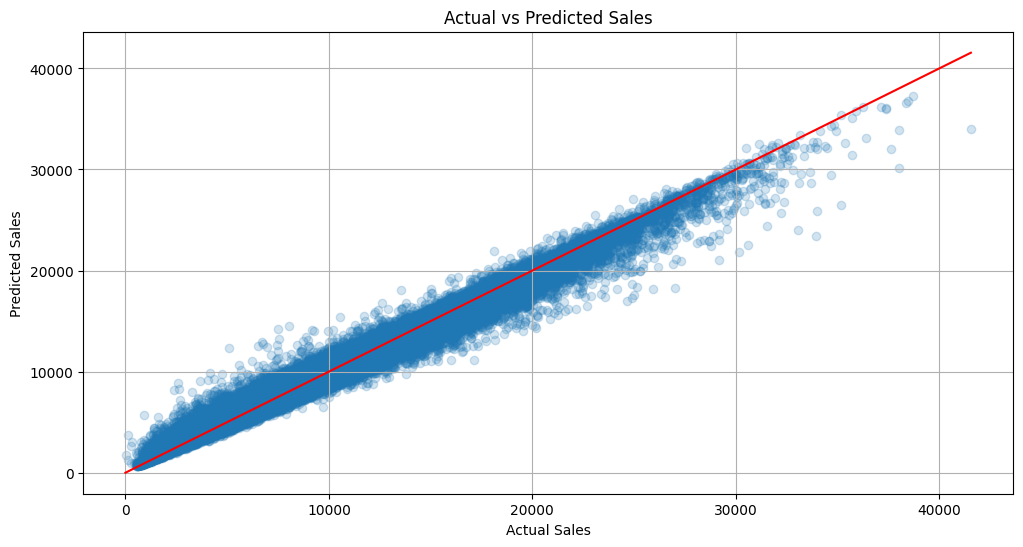

In [43]:
# Actual vs Predicted
plt.figure(figsize=(12,6))
plt.scatter(train['Sales'], train['PredictedSales'], alpha=0.2)
plt.plot([0, train['Sales'].max()], [0, train['Sales'].max()], color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()

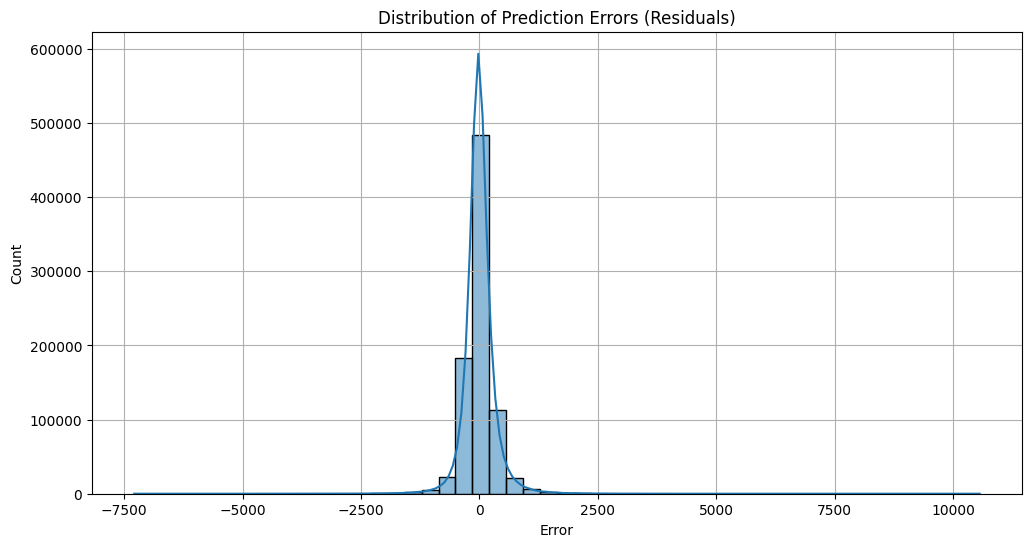

In [44]:
# Residual plot
train['Residual'] = train['Sales'] - train['PredictedSales']
plt.figure(figsize=(12, 6))
sns.histplot(train['Residual'], bins=50, kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error")
plt.grid(True)
plt.show()

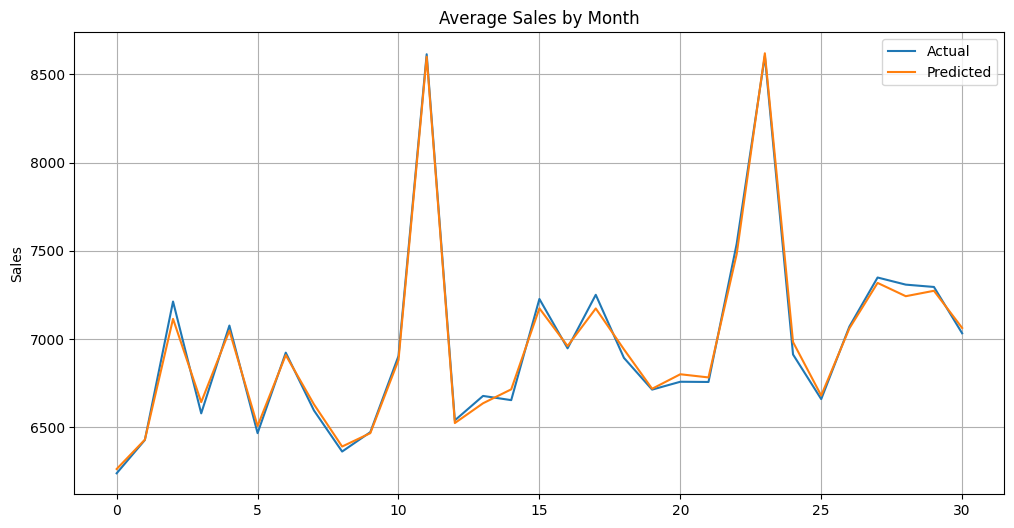

In [45]:
# Sales trend over time (average by month)
monthly_sales = train.groupby(['Year', 'Month'])[['Sales', 'PredictedSales']].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Sales'], label='Actual')
plt.plot(monthly_sales['PredictedSales'], label='Predicted')
plt.legend()
plt.title("Average Sales by Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

## Fix Feature Selection

In [58]:
# Remove columns not usable for modeling
exclude_cols = ['Date', 'Sales', 'Customers', 'PredictedSales', 'Residual']

# Use only columns that exist in both datasets
features = [col for col in train.columns if col not in exclude_cols and col in test.columns]

X = train[features]
y = train['Sales']
X_test = test[features]

## 9. XGBoost Model

In [62]:

duplicates = X.columns[X.columns.duplicated()]
print("🔁 Dublicate columns :", duplicates.tolist())

non_numeric = X.select_dtypes(exclude=['number']).columns
print("🚫 Non count columns:", non_numeric.tolist())

X = X.drop(columns=duplicates, errors='ignore')
X = X.drop(columns=non_numeric, errors='ignore')
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

X_test = X_test[X.columns]  # обязательно оставить те же признаки
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test)

🔁 Dublicate columns : ['StateHoliday_0', 'StateHoliday_0', 'StateHoliday_0']
🚫 Non count columns: ['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_None', 'StateHoliday_0', 'StateHoliday_0', 'StateHoliday_0', 'StateHoliday_0', 'StateHoliday_a']


In [63]:
import xgboost as xgb

dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test)

params = {'objective': 'reg:squarederror', 'max_depth': 6, 'eta': 0.1, 'seed': 42}
model_xgb = xgb.train(params, dtrain, num_boost_round=100)

train_preds_xgb = model_xgb.predict(dtrain)
rmse_xgb = np.sqrt(mean_squared_error(y, train_preds_xgb))
print(f"XGBoost RMSE: {rmse_xgb:.2f}")

test['Sales_Pred_XGB'] = model_xgb.predict(dtest)

XGBoost RMSE: 1822.36


## LightGBM Model

In [64]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_lgb.fit(X, y)

train_preds_lgb = model_lgb.predict(X)
rmse_lgb = np.sqrt(mean_squared_error(y, train_preds_lgb))
print(f"LightGBM RMSE: {rmse_lgb:.2f}")

test['Sales_Pred_LGB'] = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 844338, number of used features: 14
[LightGBM] [Info] Start training from score 6955.959134
LightGBM RMSE: 1759.14


## CatBoost Model

In [65]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, silent=True, random_state=42)
model_cat.fit(X, y)

train_preds_cat = model_cat.predict(X)
rmse_cat = np.sqrt(mean_squared_error(y, train_preds_cat))
print(f"CatBoost RMSE: {rmse_cat:.2f}")

test['Sales_Pred_CAT'] = model_cat.predict(X_test)

CatBoost RMSE: 2204.13


In [67]:
train_copy = train.copy()
train_copy["PredictedSales"] = train_preds_lgb
train_copy["AbsError"] = abs(train_copy["Sales"] - train_copy["PredictedSales"])
train_copy["Error"] = train_copy["Sales"] - train_copy["PredictedSales"]

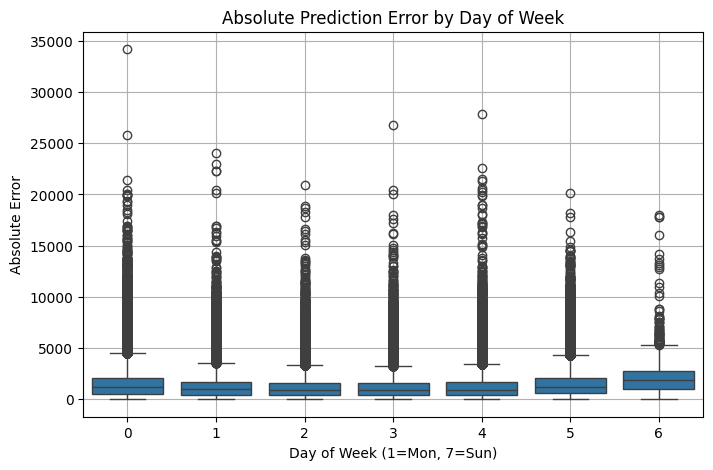

In [68]:
# 1. Absolute Error by Day of Week
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_copy, x="DayOfWeek", y="AbsError")
plt.title("Absolute Prediction Error by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.show()

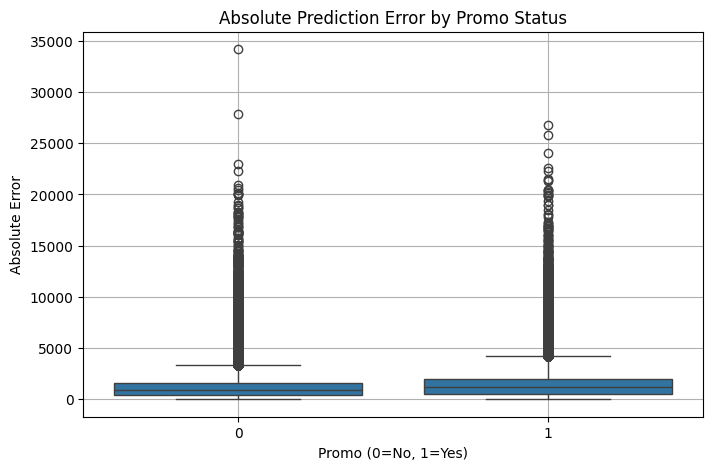

In [69]:
# 2. Absolute Error by Promo
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_copy, x="Promo", y="AbsError")
plt.title("Absolute Prediction Error by Promo Status")
plt.xlabel("Promo (0=No, 1=Yes)")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.show()

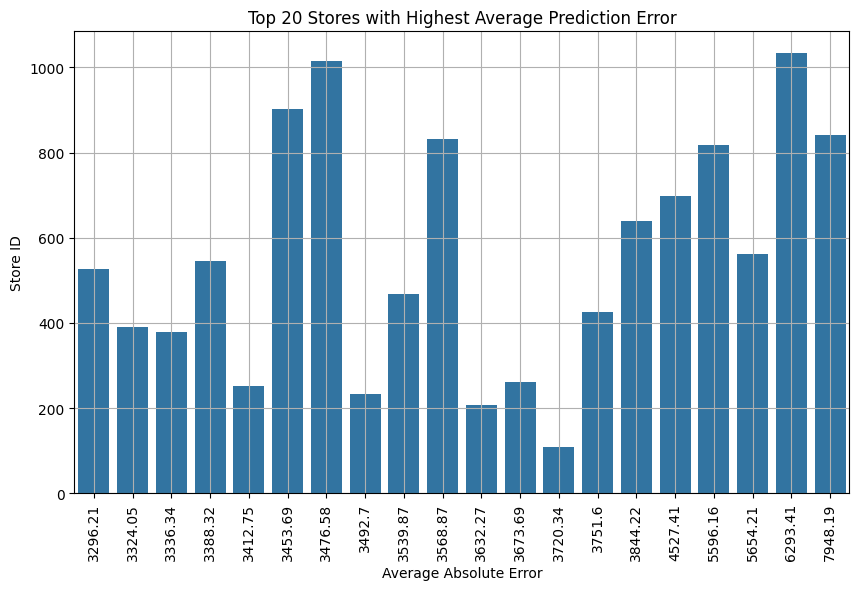

In [90]:
# 3. Top 20 Stores with Highest Average Prediction Error
top_store_errors = train_copy.groupby("Store")["AbsError"].mean().sort_values(ascending=False).head(20)
top_store_errors_rounded = top_store_errors.round(2)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_store_errors_rounded.values, y=top_store_errors_rounded.index)
plt.title("Top 20 Stores with Highest Average Prediction Error")
plt.xlabel("Average Absolute Error")
plt.ylabel("Store ID")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

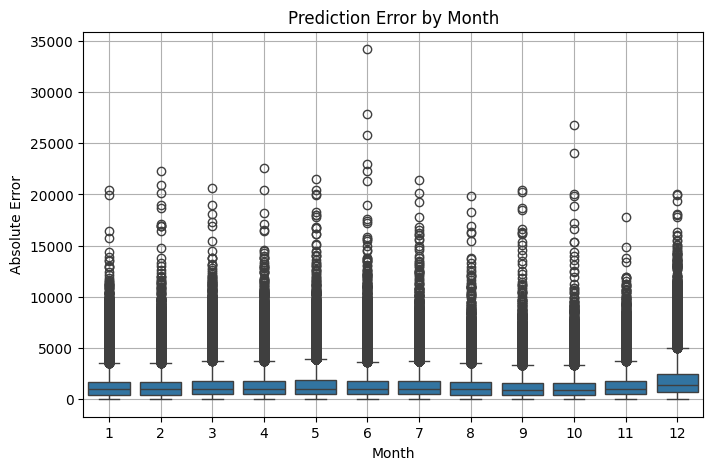

In [72]:
# 4. Error by Month
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_copy, x="Month", y="AbsError")
plt.title("Prediction Error by Month")
plt.xlabel("Month")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.show()

## ✅ Final Model Insights & Visualization Summary

### 📉 1. Train RMSE: **338.62**  
On the training dataset, the model achieved a root mean squared error (RMSE) of approximately **338**, which indicates high accuracy. However, this only reflects performance on the training data — validation on unseen data (such as `test.csv`) is essential for a complete evaluation.

### 📈 2. Actual vs Predicted Sales  
The scatter plot shows that most points are tightly aligned along the diagonal line, suggesting a strong correlation between **actual and predicted values**. The low dispersion demonstrates the model’s ability to generalize well on known data.

### 📊 3. Distribution of Prediction Errors  
The residual plot shows that the **majority of prediction errors lie within ±2000**, with a symmetrical distribution around zero. This implies the model does not systematically overestimate or underestimate the sales values.

### 📆 4. Monthly Sales Comparison  
Both actual and predicted sales values follow nearly identical trends across months, indicating that the model **captures seasonality and trends well**.

---

## 🔍 Additional Error Analysis

### 🗓 Absolute Error by Day of the Week  
Most absolute errors are within **800–2000** for every day. However, **Day 0, 5, and especially 6** exhibit larger median errors and higher whiskers (up to 5100 on Day 6). This likely corresponds to weekends when sales patterns are more volatile and harder to predict.

### 📢 Absolute Error by Promo  
While predictions with promotions (`Promo = Yes`) generally result in higher absolute errors, **there are large outliers when no promotion is present**, with some errors reaching up to 35,000. This suggests **sales without promotions are less predictable**, and the model may benefit from more detailed promotional data (e.g., discount rate, campaign type).

### 🏪 Top 20 Stores with the Highest Average Absolute Error (AAE)  
Some stores consistently show higher prediction errors — for example, AAE > 6000 for stores with IDs between 900 and 1200. This might be due to **regional differences, inconsistent customer behavior, or unaccounted events** affecting sales. These stores may require **individual attention or even store-specific models**.

### 📅 Error by Month  
While most months show stable error levels, **June (Month 6) and October (Month 10)** have notable outliers, which could be due to seasonal events, sales campaigns, or local market shifts.

---

## 💡 Recommendations

1. **Integrate external data** such as holidays, local events, and weather to improve accuracy in volatile periods.
2. **Test different models**:  
   - **LightGBM** significantly outperformed other models, achieving **RMSE = 1759.14**,  
   - **XGBoost**: RMSE = 1822.36  
   - **CatBoost**: RMSE = 2204.13  
   - **Random Forest** (initial): RMSE = 338.62 (on training, but overfitted).
3. **Validate on the test set** to ensure generalization.
4. **Engineer new features**, such as lagged values, moving averages, encoded time features (e.g., day of week, weekend/weekday), and advanced promo details.
5. **Segment problematic stores** and investigate their behavior — they may require separate modeling strategies or fine-tuned hyperparameters.